# 1.转置卷积

In [6]:
import torch
import torch.nn as nn

in_channels = 1
out_channels = 1
input_image = torch.randn(1, in_channels, 4, 4)
# bach_size=1, channel=1 ,width=4,height=4
print(input_image)
model = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=(1, 1), stride=(1, 1))
# s(i-1)-2p+k  =1*(4-1)-2*0+1=4

out = model(input_image)
print(out.shape)
print(out)

model_2 = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
# s(i-1)-2p+k  =2*(4-1)-2*1+2=6
out_2 = model_2(input_image)
print(out_2.shape)


tensor([[[[ 0.5473,  0.3649,  1.8538, -0.9376],
          [ 0.4194,  1.3776, -0.0543, -0.9235],
          [-1.8235,  0.0083, -0.4024,  1.3257],
          [-0.2997, -1.2016, -0.7124,  1.1128]]]])
torch.Size([1, 1, 4, 4])
tensor([[[[ 0.3332,  0.4445, -0.4643,  1.2395],
          [ 0.4112, -0.1736,  0.7003,  1.2308],
          [ 1.7801,  0.6621,  0.9128, -0.1419],
          [ 0.8501,  1.4006,  1.1020, -0.0120]]]],
       grad_fn=<SlowConvTranspose2DBackward0>)
torch.Size([1, 1, 6, 6])


# 2. nn.Upsample上采样

In [1]:
import torch
import torch.nn as nn

input_image = torch.tensor([[[[1., 2.],
                              [3., 4.]]]])
model = nn.Upsample(scale_factor=2, mode='nearest')
out = model(input_image)
print(out)

tensor([[[[1., 1., 2., 2.],
          [1., 1., 2., 2.],
          [3., 3., 4., 4.],
          [3., 3., 4., 4.]]]])


In [11]:
import torch
import torch.nn as nn

input_image = torch.tensor([[[[1., 2.],
                              [3., 4.]]]])
m = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False)
o = m(input_image)
print(o)

tensor([[[[1.0000, 1.2500, 1.7500, 2.0000],
          [1.5000, 1.7500, 2.2500, 2.5000],
          [2.5000, 2.7500, 3.2500, 3.5000],
          [3.0000, 3.2500, 3.7500, 4.0000]]]])


In [12]:
import torch
import torch.nn as nn

input_image = torch.tensor([[[[1., 2.],
                              [3., 4.]]]])
m = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
o = m(input_image)
print(o)

tensor([[[[1.0000, 1.3333, 1.6667, 2.0000],
          [1.6667, 2.0000, 2.3333, 2.6667],
          [2.3333, 2.6667, 3.0000, 3.3333],
          [3.0000, 3.3333, 3.6667, 4.0000]]]])


In [13]:

import torch
import torch.nn as nn

input_image = torch.tensor([[[[1., 2.],
                              [3., 4.]]]])
m = nn.UpsamplingNearest2d(scale_factor=2)
o = m(input_image)
print(o)

tensor([[[[1., 1., 2., 2.],
          [1., 1., 2., 2.],
          [3., 3., 4., 4.],
          [3., 3., 4., 4.]]]])


In [14]:
import torch
import torch.nn as nn

input_image = torch.tensor([[[[1., 2.],
                              [3., 4.]]]])
m = nn.UpsamplingBilinear2d(scale_factor=2)
o = m(input_image)
print(o)

tensor([[[[1.0000, 1.3333, 1.6667, 2.0000],
          [1.6667, 2.0000, 2.3333, 2.6667],
          [2.3333, 2.6667, 3.0000, 3.3333],
          [3.0000, 3.3333, 3.6667, 4.0000]]]])


In [8]:
#测试上采样
import torch
import torch.nn as nn

m = nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2), return_indices=True)
upm = nn.MaxUnpool2d((3, 3), stride=(1, 1))
data4 = torch.randn(1, 1, 6, 6)
output5, indices = m(data4)
output6 = upm(output5, indices)

print('\ndata4:', data4,
      '\nmaxPool2d', output5,
      '\nindices:', indices,
      '\noutput6:', output6)

RuntimeError: Found an invalid max index: 18 (output volumes are of size 4x4

图片的尺寸 (200, 200, 3)
torch.Size([1, 3, 300, 300])
上采样后图片大小 (300, 300, 3)


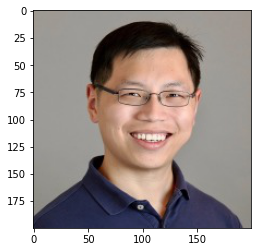

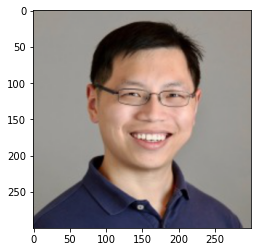

In [15]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch

img = Image.open('./test.jpg')
img = np.array(img)
print("图片的尺寸", img.shape)
plt.imshow(img)
img = np.array(img).transpose(2, 0, 1).reshape(1, 3, 200, 200)
torch_img = torch.FloatTensor(img)

out = F.interpolate(torch_img, size=(300, 300), mode='bilinear')
# 这里的(4,4)指的是将后两个维度放缩成4*4的大小


print(out.shape)

plt.figure()
mean_pool_img = out[0].numpy().transpose((1, 2, 0))
# 把图像变成
mean_pool_img = mean_pool_img.clip(0, 255).astype(int)
plt.imshow(mean_pool_img)
print("上采样后图片大小", mean_pool_img.shape)


# 3. 线性差值

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import os
import torch
import torch.nn.functional as F


def bilinear_interpolation(src, dst_size, align_corners=False):
    """
    双线性插值高效实现
    :param src: 源图像H*W*C
    :param dst_size: 目标图像大小H*W
    :return: 双线性插值后的图像
    """
    (src_h, src_w, src_c) = src.shape  # 原图像大小 H*W*C
    (dst_h, dst_w), dst_c = dst_size, src_c  # 目标图像大小H*W*C

    if src_h == dst_h and src_w == dst_w:  # 如果大小不变，直接返回copy
        return src.copy()
    # 矩阵方式实现
    h_d = np.arange(dst_h)  # 目标图像H方向坐标
    w_d = np.arange(dst_w)  # 目标图像W方向坐标
    if align_corners:
        h = float(src_h - 1) / (dst_h - 1) * h_d
        w = float(src_w - 1) / (dst_w - 1) * w_d
    else:
        h = float(src_h) / dst_h * (h_d + 0.5) - 0.5  # 将目标图像H坐标映射到源图像上
        w = float(src_w) / dst_w * (w_d + 0.5) - 0.5  # 将目标图像W坐标映射到源图像上

    h = np.clip(h, 0, src_h - 1)  # 防止越界，最上一行映射后是负数，置为0
    w = np.clip(w, 0, src_w - 1)  # 防止越界，最左一行映射后是负数，置为0

    h = np.repeat(h.reshape(dst_h, 1), dst_w, axis=1)  # 同一行映射的h值都相等
    w = np.repeat(w.reshape(dst_w, 1), dst_h, axis=1).T  # 同一列映射的w值都相等

    h0 = np.floor(h).astype(int)  # 同一行的h0值都相等
    w0 = np.floor(w).astype(int)  # 同一列的w0值都相等

    h0 = np.clip(h0, 0, src_h - 2)  # 最下一行上不大于src_h - 2，相当于padding
    w0 = np.clip(w0, 0, src_w - 2)  # 最右一列左不大于src_w - 2，相当于padding

    h1 = np.clip(h0 + 1, 0, src_h - 1)  # 同一行的h1值都相等，防止越界
    w1 = np.clip(w0 + 1, 0, src_w - 1)  # 同一列的w1值都相等，防止越界

    q00 = src[h0, w0]  # 取每一个像素对应的q00
    q01 = src[h0, w1]  # 取每一个像素对应的q01
    q10 = src[h1, w0]  # 取每一个像素对应的q10
    q11 = src[h1, w1]  # 取每一个像素对应的q11

    h = np.repeat(h[..., np.newaxis], dst_c, axis=2)  # 图像有通道C，所有的计算都增加通道C
    w = np.repeat(w[..., np.newaxis], dst_c, axis=2)
    h0 = np.repeat(h0[..., np.newaxis], dst_c, axis=2)
    w0 = np.repeat(w0[..., np.newaxis], dst_c, axis=2)
    h1 = np.repeat(h1[..., np.newaxis], dst_c, axis=2)
    w1 = np.repeat(w1[..., np.newaxis], dst_c, axis=2)

    r0 = (w1 - w) * q00 + (w - w0) * q01  # 双线性插值的r0
    r1 = (w1 - w) * q10 + (w - w0) * q11  # 双线性差值的r1
    q = (h1 - h) * r0 + (h - h0) * r1  # 双线性差值的q
    dst = q.astype(src.dtype)  # 图像的数据类型
    return dst


if __name__ == "__main__":
    def unit_test2():
        image_file = os.path.join(os.getcwd(), 'test.jpg')
        image = mpimg.imread(image_file)
        print("原图像大小", image.shape)
        image_scale = bilinear_interpolation(image, (256, 256))

        print("差值后的图像", image_scale.shape)
        print(image)
        print(image_scale)
        fig, axes = plt.subplots(1, 2, figsize=(8, 10))
        axes = axes.flatten()
        axes[0].imshow(image)
        axes[1].imshow(image_scale)
        axes[0].axis([0, image.shape[1], image.shape[0], 0])
        axes[1].axis([0, image_scale.shape[1], image_scale.shape[0], 0])
        fig.tight_layout()
        plt.show()
        pass


    unit_test2()

原图像大小 (200, 200, 3)
差值后的图像 (256, 256, 3)
[[[159 152 144]
  [159 152 144]
  [157 153 144]
  ...
  [159 152 144]
  [159 152 144]
  [159 152 144]]

 [[159 152 144]
  [159 152 144]
  [157 153 144]
  ...
  [159 152 144]
  [159 152 144]
  [159 152 144]]

 [[159 152 144]
  [159 152 144]
  [157 153 144]
  ...
  [158 151 143]
  [158 151 143]
  [159 152 144]]

 ...

 [[ 35  36  57]
  [ 21  22  43]
  [ 35  36  57]
  ...
  [140 137 132]
  [142 141 136]
  [141 140 135]]

 [[ 24  25  46]
  [ 32  33  54]
  [ 31  32  53]
  ...
  [141 138 133]
  [142 141 136]
  [140 139 134]]

 [[ 27  28  49]
  [ 35  36  57]
  [ 29  30  51]
  ...
  [142 139 134]
  [142 141 136]
  [139 138 133]]]
[[[159 152 144]
  [159 152 144]
  [158 152 144]
  ...
  [159 152 144]
  [159 152 144]
  [159 152 144]]

 [[159 152 144]
  [159 152 144]
  [158 152 144]
  ...
  [159 152 144]
  [159 152 144]
  [159 152 144]]

 [[159 152 144]
  [159 152 144]
  [158 152 144]
  ...
  [158 151 143]
  [158 151 143]
  [159 152 144]]

 ...

 [[ 28  29 

In [29]:
import torch
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt

i = np.array(Image.open("test.jpg"))
input_image = i.reshape(1, 3, 200, 200)
print(input_image.shape)
input_image = torch.FloatTensor(input_image)
m = nn.Upsample(scale_factor=1.25, mode='bilinear', align_corners=True)
o = m(input_image)
print(o.shape)

image = o[0].view(250, 250, 3).numpy()
image = image.clip(0, 255).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(8, 10))
axes = axes.flatten()
axes[0].imshow(i)
axes[1].imshow(image)
axes[0].axis([0, i.shape[1], i.shape[0], 0])
axes[1].axis([0, image.shape[1], image.shape[0], 0])
fig.tight_layout()
plt.show()



(1, 3, 200, 200)
torch.Size([1, 3, 250, 250])


In [41]:
import torch.nn.functional as F
import torch

from PIL import Image
import numpy as np

i = np.array(Image.open("test.jpg"))
inputv = i.reshape(1, 3, 200, 200)
inputv = torch.FloatTensor(inputv)
print(inputv)

# 生成grid，这个grid大小为(1,8,8,2)，空间尺寸而言是原输入图片的两倍。
d = torch.linspace(-1, 1, 250)
meshx, meshy = torch.meshgrid((d, d))
grid = torch.stack((meshy, meshx), 2)
grid = grid.unsqueeze(0)  # add batch dim

# 进行双线性采样，其中指定align_corners=True保证了输出的整个图片的角边像素与原输入的一致性。
o = F.grid_sample(inputv, grid, align_corners=True)
print(o)
print(o.shape)
image = o[0].reshape(250, 250, 3).numpy()
image = image.clip(0, 255).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(8, 10))
axes = axes.flatten()
axes[0].imshow(i)
axes[1].imshow(image)
axes[0].axis([0, i.shape[1], i.shape[0], 0])
axes[1].axis([0, image.shape[1], image.shape[0], 0])
fig.tight_layout()
plt.show()

tensor([[[[159., 152., 144.,  ..., 148., 158., 155.],
          [148., 158., 155.,  ..., 155., 148., 158.],
          [155., 148., 159.,  ..., 159., 152., 144.],
          ...,
          [167., 151., 206.,  ..., 160., 153., 147.],
          [156., 155., 151.,  ...,  25., 100.,  65.],
          [ 45., 123.,  87.,  ..., 158., 145., 196.]],

         [[169., 152., 196.,  ..., 159., 152., 146.],
          [155., 154., 150.,  ...,  37., 123.,  81.],
          [ 59., 153., 108.,  ..., 155., 141., 171.],
          ...,
          [ 99., 152., 113.,  ..., 145., 134., 157.],
          [148., 141., 154.,  ..., 149., 148., 144.],
          [151., 150., 148.,  ...,  57., 146., 112.]],

         [[ 87., 156., 115.,  ..., 145., 136., 154.],
          [149., 143., 151.,  ..., 149., 148., 144.],
          [151., 150., 148.,  ...,  62., 152., 116.],
          ...,
          [ 27.,  28.,  49.,  ...,  80.,  42.,  48.],
          [ 82.,  42.,  48.,  ...,  55.,  88.,  52.],
          [ 55.,  88.,  52.,  ...

# 2.反池化

In [4]:
import torch

import torch.nn as nn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 反池化
upm = nn.MaxUnpool2d((3, 3), stride=(1, 1))
image = np.array(Image.open("test.jpg"))
data = image.reshape(1, 3, 200, 200)
data = torch.FloatTensor(data)

output = upm(data, indices=1.5)
image_scale = output[0].numpy().transpose(1, 2, 0)
print(image_scale.shape)
fig, axes = plt.subplots(1, 2, figsize=(8, 10))
axes = axes.flatten()
axes[0].imshow(image)
axes[1].imshow(image_scale)
axes[0].axis([0, image.shape[1], image.shape[0], 0])
axes[1].axis([0, image_scale.shape[1], image_scale.shape[0], 0])
fig.tight_layout()
plt.show()

TypeError: max_unpool2d(): argument 'indices' (position 2) must be Tensor, not float